In [114]:
import lightcurves
import optical
import matplotlib.pyplot as mp
import numpy as np
import coordinates
import variables
%matplotlib inline


In [115]:
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'
target = 'NGC3201'
folder = '/Users/jrneeley/CRRP/'+target+'/'
cluster_ra = '10:17:36.82'
cluster_dec = '-46:24:44.9'
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)



In [116]:
optical.find_variables_fnl(optical_folder, target, center_ra, center_dec, folder=folder)

Reading optical catalog for NGC3201...
Reading optical catalog for NGC3201...
Finished reading optical catalog.


In [121]:
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_folder, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

datasets = optical.compile_datasets(target, old=0, folder=folder, returnColors=False)

Reading optical catalog for NGC3201...
Finished reading optical catalog.


Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:

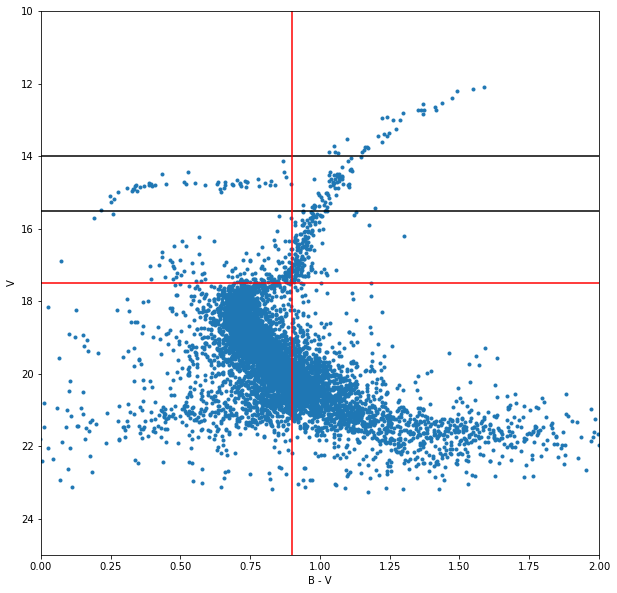

In [122]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
mp.axhline(15.5, color='k')
mp.axhline(14, color='k')
#Define GB
mp.axvline(0.9, color='r')
mp.axhline(17.5, color='r')

88 candidate RRL stars.
123 candidate variables on GB.
387 other candidate variables.


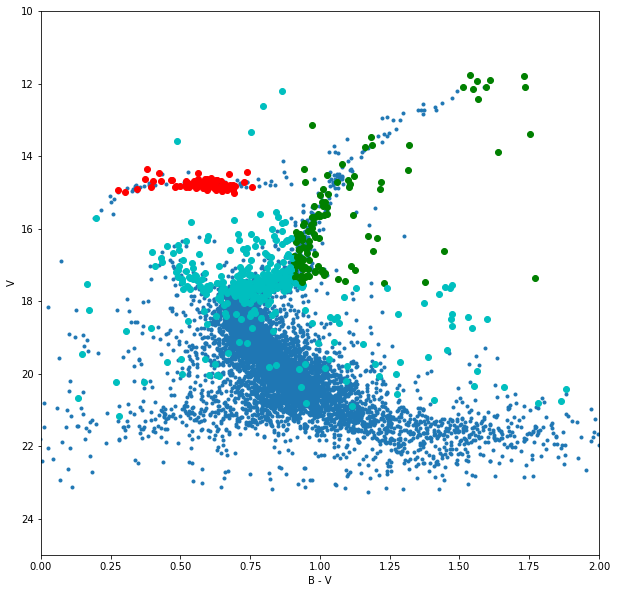

In [123]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= 15.5 and mag_var >= 14 and color_var <= 0.9):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= 17.5 and color_var >= 0.9):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [124]:
for ind, star in enumerate(RRL_candidates):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

0 V61 ['10:15:49.23'] ['-46:21:39.7']
1 V62 ['10:15:55.74'] ['-46:27:55.3']
2 V63 ['10:16:1.31'] ['-46:23:51.9']
3 V53 ['10:16:13.05'] ['-46:37:1.2']
4 V64 ['10:16:35.78'] ['-46:10:31.1']
5 V59 ['10:16:50.04'] ['-46:25:49.8']
6 V66 ['10:16:59.1'] ['-46:19:48.2']
7 V46 ['10:16:59.1'] ['-46:33:4.1']
8 V67 ['10:17:0.9'] ['-46:26:35.3']
9 V43 ['10:17:1.36'] ['-46:24:25.9']
10 V24 ['10:17:4.92'] ['-46:24:25.3']
11 V55 ['10:17:5.38'] ['-46:12:0.1']
12 V42 ['10:17:8.67'] ['-46:21:28.1']
13 V30 ['10:17:9.91'] ['-46:20:14.3']
14 V15 ['10:17:10.57'] ['-46:27:32.5']
15 V97 ['10:17:11.66'] ['-46:25:50.8']
16 V29 ['10:17:12.92'] ['-46:22:49.6']
17 V48 ['10:17:13.34'] ['-46:24:28.8']
18 V70 ['10:17:15.94'] ['-46:24:54.5']
19 V69 ['10:17:16.26'] ['-46:8:10.7']
20 V51 ['10:17:17.67'] ['-46:25:6.2']
21 V16 ['10:17:18.48'] ['-46:28:36.6']
22 V71 ['10:17:19.37'] ['-46:26:36.5']
23 V10 ['10:17:20.14'] ['-46:20:50.1']
24 V13 ['10:17:22.04'] ['-46:23:11.2']
25 V14 ['10:17:22.44'] ['-46:22:31.4']
26 V92 ['10

In [127]:
ind = 84

#lcv_name = RRL_candidates[ind]
lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

V60


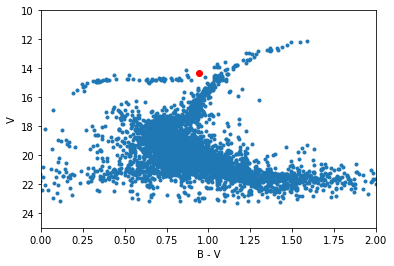

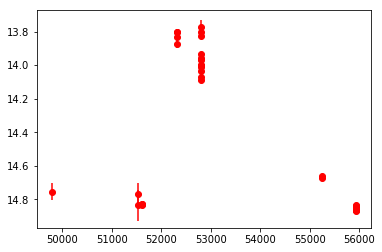

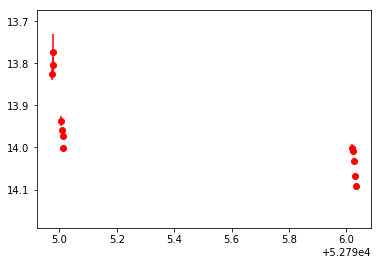

/Users/jrneeley/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 31 but corresponding boolean dimension is 12


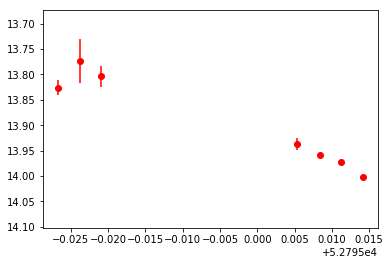

In [128]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)


[ 0.10998165  0.20073677  0.32493675  0.57085714  0.87206596]


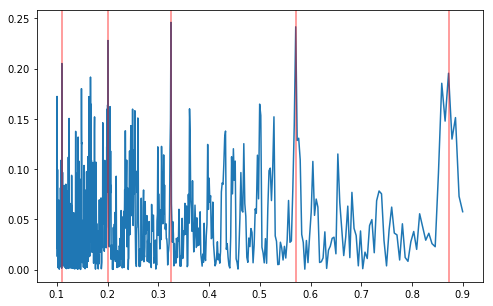

In [112]:
#candidate_periods = variables.candidate_variables(V, lcv_name, min_period=1.0, max_period=20., grid_num=1000)
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)



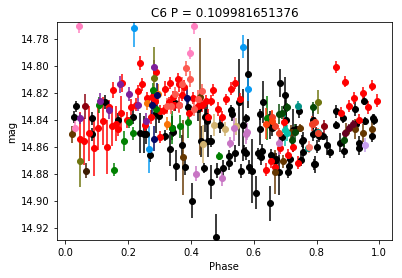

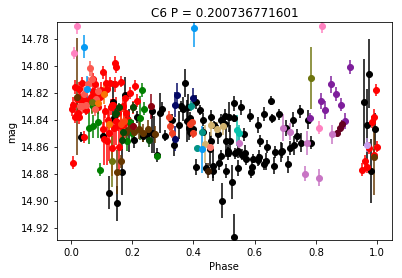

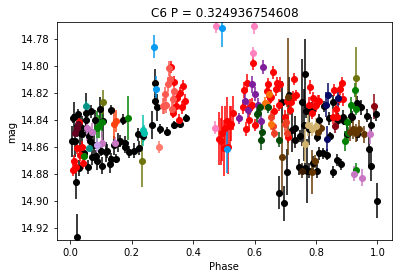

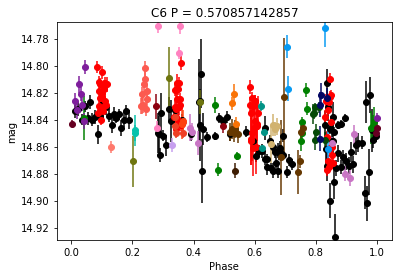

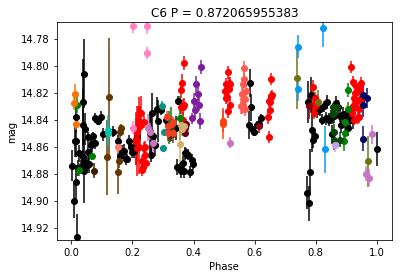

In [113]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)

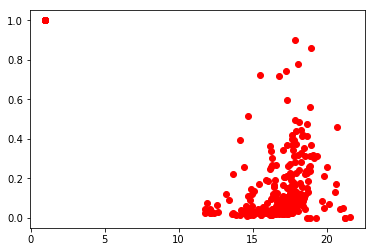

In [122]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')

for ind, lcv in enumerate(data['id']):
    lcv_name = data['id'][ind]
    lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    
        # remove data with large error bars
        error_threshold = 0.05
    #    color_var = np.mean(B[0][V[1] < error_threshold]) - np.mean(V[0][V[1] < error_threshold])
        mag_var = np.mean(V[0][V[1] < error_threshold])
        std = np.std(V[0][V[1] < error_threshold])
    
        mp.plot(mag_var, std, 'ro')
    except:
        continue
    # remove data with large error bars
   # error_threshold = 0.05
   # V[0][V[1] > error_threshold] = np.nan
   # V[1][V[1] > error_threshold] = np.nan
mp.show()

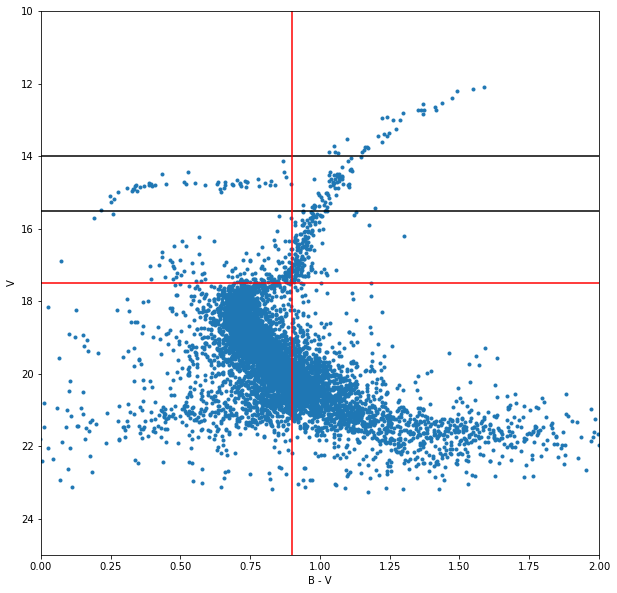

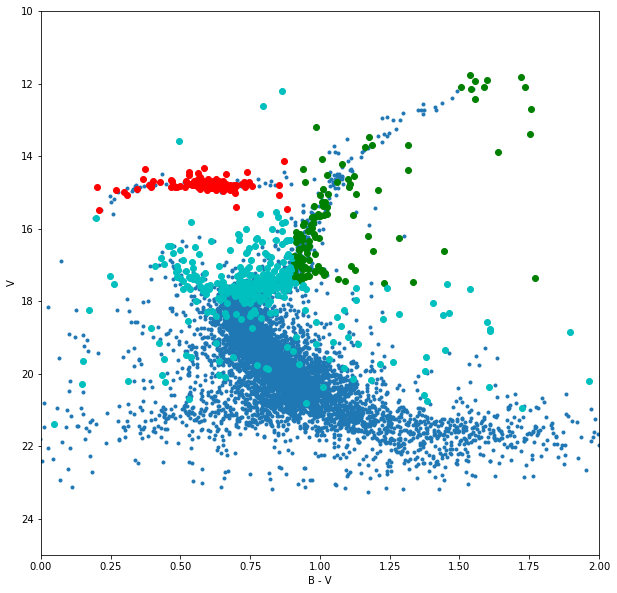

In [30]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= 15.5 and mag_var >= 14 and color_var <= 0.9):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= 17.5 and color_var >= 0.9):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

    
    
